In [4]:
import os
import numpy as np
import pandas as pd
import glob
import pickle
import seaborn as sns
import time
from tqdm import tqdm
from tqdm import trange
import json
import re


from matplotlib import pyplot
from matplotlib.pyplot import *
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from numpy.linalg import norm
import scipy
import scipy.io as sio
from scipy.spatial.distance import cosine
import sklearn
from sklearn.model_selection import KFold
from sklearn.cluster import SpectralClustering, AgglomerativeClustering


sys.path.append( os.path.abspath(os.path.join('..')) )
from algorithm.model import admm as admm3S
from algorithm.vanillaNMF import vanillaNMF
from helper.visualization import plot_Q

data_directory = '/Users/lamk5/Desktop/Data/CBCL-Analysis/'
output_directory = '../output'

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [6]:

# HBN_participant.to_csv( os.path.join(output_directory, 'preprocessed/HBN_participants_20210519.csv'), index=False)

HBN = pd.read_csv( os.path.join(output_directory, 'preprocessed/HBN_participants_20210519.csv' ) )

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

CBCL_column = [c for c in HBN.columns.tolist() if ('CBCL_' in c) & hasNumbers(c) & ('113' not in c)]
CBCL_subscale_raw = [c for c in HBN.columns.tolist() if ('CBCL_' in c) & ~hasNumbers(c) & (c[-2:] != ('_T'))]
CBCL_subscale_T = [c for c in HBN.columns.tolist() if ('CBCL_' in c) & ~hasNumbers(c) & (c[-2:] == ('_T'))]


M = HBN[CBCL_column].values.astype('float')
C = HBN[['Age', 'Sex']].values.astype('float')
assert(np.sum(np.isnan(C)) == 0)
Cmirror = np.hstack((C, 1-C))


In [7]:
missdata_mask = 1 - np.isnan(M)
M[np.isnan(M)] = 0
print('Range of data matrix M: [{}, {}]'.format(np.min(M), np.max(M)))

Range of data matrix M: [0.0, 2.0]


In [8]:
np.savez(os.path.join(output_directory, 'preprocessed/HBN_data_20210519.npz'),
         M=M, C=C, Cmirror=Cmirror, missdata_mask=missdata_mask)

In [9]:
CBCL_question = pd.read_csv(os.path.join(data_directory,'NIH-CBCL/CBCL2001_item_variables2.csv'), index_col=False)
CBCL_question
CBCL_question = CBCL_question.iloc[:-1,:]
QuestionClass = list(np.unique(CBCL_question['CBCL2001_6-18_scale'].values))
group_index = []
CBCL_question
for k in range(CBCL_question.shape[0]):
    qid = CBCL_question.loc[k]['CBCL2001_6-18_varname'].split('.')[0]
    group_index.append(str(QuestionClass.index(CBCL_question.loc[k]['CBCL2001_6-18_scale'])) + '-' + qid)
CBCL_question['group'] = group_index
CBCL_question

question = CBCL_question['CBCL2001_6-18_varname'].values

Loss: 2.506e+04:  44%|████▎     | 87/200 [00:22<00:29,  3.89it/s]


Algorithm converged with relative error < 1e-05.


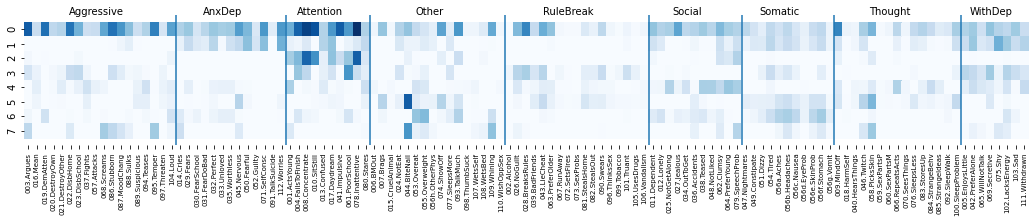

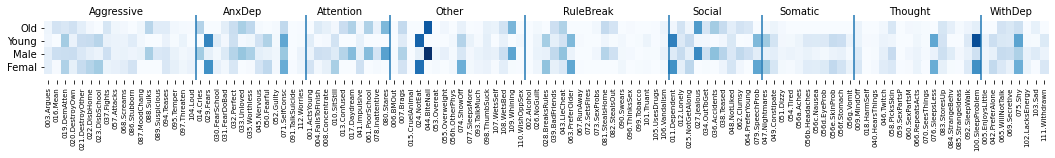

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
filename = os.path.join(output_directory, 'factorizations/proposed_20210519-k8b1-Wbdd.npz')

# if os.path.exists(filename):
#     factorization_result = np.load(filename)
#     W = factorization_result['W']
#     Q = factorization_result['Q']
    
# else:

k = 8
beta = 1
rho = 3
tau = 3
W, Q, obj_trend = admm3S(M, k, beta, C=Cmirror, rho=rho, tau=tau, mask=missdata_mask, Wconstraint=(True, 1), tol=1e-5)
np.savez(filename,W=W, Q=Q, M=M, C=C)

plot_Q(Q, Cmirror, CBCL_question, 'HBN', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

#     filename = './factorization_result/NMF-HBN2001-k7-Bb1-Wbdd.npz'
# np.savez(filename,W=W, Q=Q, M=M, C=C)

Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Algorithm converged with relative error < 0.0001.


Loss: 2.76e+04:  34%|███▍      | 69/200 [02:21<04:29,  2.06s/it] 


Algorithm converged with relative error < 0.0001.


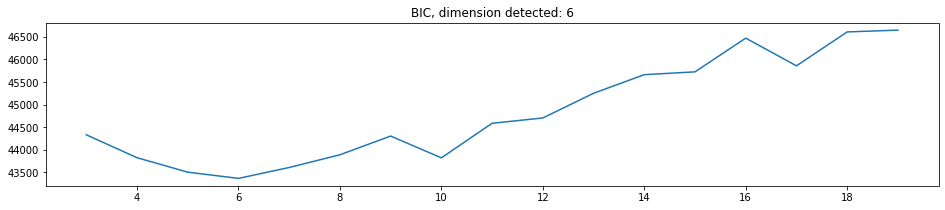

In [66]:
BIC = []
nfactor_list = np.arange(3,20)
for k in nfactor_list:
    beta = 1
    rho = 3
    tau = 3
    W, Q, obj_trend = admm3S(M, k, beta, C=Cmirror, rho=rho, tau=tau, mask=missdata_mask, Wconstraint=(True, 1), tol=1e-4)
    BIC.append( 2 * 0.5 * np.linalg.norm(missdata_mask*(M - W@(Q[:,:k].T) - Cmirror@(Q[:,k:].T)), ord='fro') ** 2 + np.log(v.shape[0])*(v.shape[1]*(k+1) - k*(k-1)/2) )

fig, ax = pyplot.subplots(figsize=(16,3))
ax.plot(nfactor_list, BIC)
ax.set_title('BIC, dimension detected: {}'.format(nfactor_list[np.argmin(BIC)]))
pyplot.show()

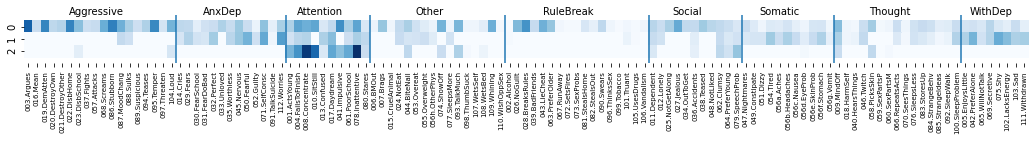

array([0, 1, 2])

In [45]:
W, Q, err = vanillaNMF(M, 3, missdata_mask)
plot_Q(Q, None, CBCL_question, 'HBN', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

# filename = './factorization_result/vanillaNMF-mu-HBN2001-k3.npz'
# np.savez(filename,W=W, Q=Q, M=M, C=C)

In [46]:
from sklearn.decomposition import FactorAnalysis
from algorithm.FA_rotation import _varimax, _promax

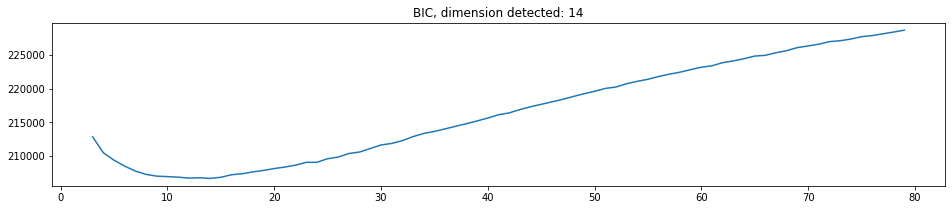

In [48]:
BIC = []
nfactor_list = np.arange(3,80)
for k in nfactor_list:
    scipy_fa = FactorAnalysis(n_components=k, random_state=0, rotation=None)
    v = data[CBCL_column].values.astype('float')
    v = np.nan_to_num(v)
    scipy_fa.fit(v)
    Q, Rotate, _ = _promax(scipy_fa.components_.T) # (scipy_fa.components_.T)@Rotate = Q
    BIC.append( -2*scipy_fa.loglike_[-1] + np.log(v.shape[0])*(v.shape[1]*(k+1) - k*(k-1)/2) )

fig, ax = pyplot.subplots(figsize=(16,3))
ax.plot(nfactor_list, BIC)
ax.set_title('BIC, dimension detected: {}'.format(nfactor_list[np.argmin(BIC)]))
pyplot.show()

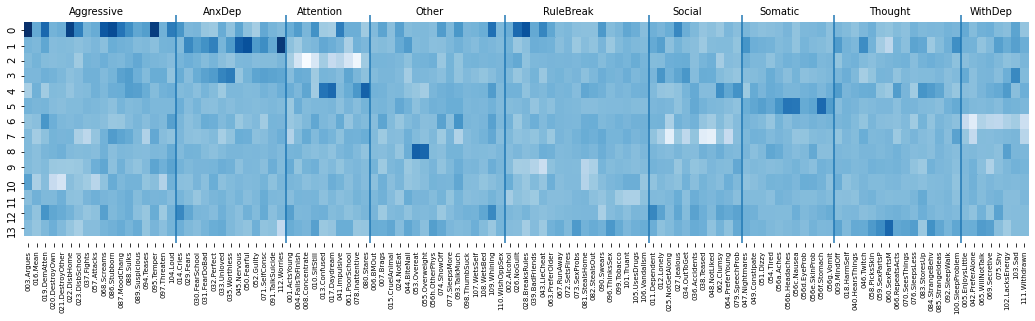

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [50]:
scipy_fa = FactorAnalysis(n_components=14, random_state=0, rotation=None)
v = data[CBCL_column].values.astype('float')
v = np.nan_to_num(v)
scipy_fa.fit(v)
Q, Rotate, _ = _promax(scipy_fa.components_.T) # (scipy_fa.components_.T)@Rotate = Q
W = scipy_fa.transform(v)@(Rotate.T)

# np.savez('./factorization_result/FA-HBN2001-k13-promax-BIC-noC.npz',W=W, Q=Q, M=v, C=None)
plot_Q(Q, None, CBCL_question, 'HBN2001', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

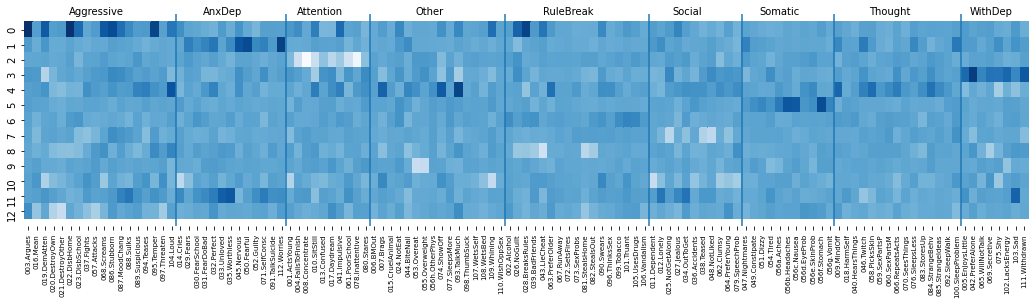

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [51]:
scipy_fa = FactorAnalysis(n_components=13, random_state=0, rotation=None)
v = data[CBCL_column].values.astype('float')
v = np.nan_to_num(v)
scipy_fa.fit(v)
Q, Rotate, _ = _promax(scipy_fa.components_.T) # (scipy_fa.components_.T)@Rotate = Q
W = scipy_fa.transform(v)@(Rotate.T)

# np.savez('./factorization_result/FA-HBN2001-k13-promax-BIC-noC.npz',W=W, Q=Q, M=v, C=None)
plot_Q(Q, None, CBCL_question, 'HBN2001', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

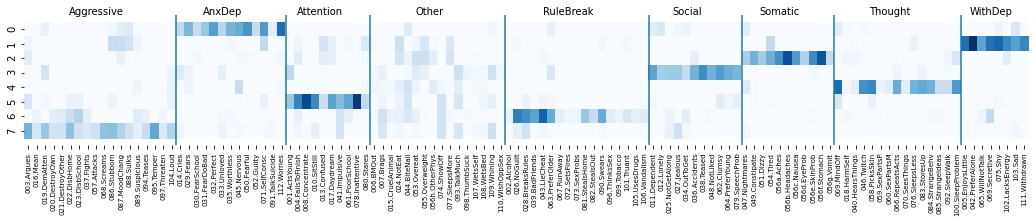

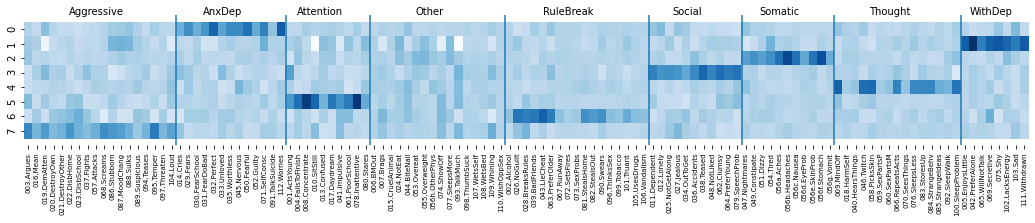

array([0, 1, 2, 3, 4, 5, 6, 7])

In [55]:

W = data[CBCL_subscale_raw[:8]].values.astype('float')
inds = np.where(np.isnan(W))
W[inds] = np.take(np.nanmean(W, axis=0), inds[1])

# Q = scipy.linalg.lstsq(W, np.nan_to_num(M))[0].T


from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def nnQPsolver(H, f, upperbound):
    P = matrix(H)
    q = matrix(f)
    if upperbound[0] == False:
        G = matrix( -np.eye(H.shape[1]) )
        h = matrix( np.zeros(H.shape[1]) )
    elif upperbound[0] == True:
        G = matrix( np.vstack((-np.eye(H.shape[1]), np.eye(H.shape[1]))) )
        h = matrix( np.hstack((np.zeros(H.shape[1]), upperbound[1]*np.ones(H.shape[1]) )) )
    sol = solvers.qp(P,q,G,h)
    return np.array(sol['x']).flatten()

k = W.shape[1]
Q = np.zeros((M.shape[1], k))
H = (W.T)@W
for j in range(M.shape[1]):
    f = -( np.nan_to_num(M[:,j])@W )
    Q[j,:] = nnQPsolver(H, f, upperbound=(False, 1))

    
plot_Q(Q, None, CBCL_question, 'ABCD2001', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)




# vC = np.nan_to_num(M) - C@np.linalg.inv(C.T@C)@(C.T)@np.nan_to_num(M)
# QR = scipy.linalg.lstsq(W, vC)[0].T
# plot_Q(QR, None, CBCL_question, 'ABCD2001', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

# np.savez('./factorization_result/Subscale-HBN2001-raw.npz',W=W, Q=QR, M=np.nan_to_num(M), C=C)


QR = scipy.linalg.lstsq(W, np.nan_to_num(M))[0].T
plot_Q(QR, None, CBCL_question, 'ABCD2001', 'model', Ctitle=['Old', 'Young', 'Male', 'Femal'], show_all=True)

# np.savez('./factorization_result/Subscale-HBN2001-raw.npz',W=W, Q=QR, M=np.nan_to_num(M), C=C)